# 3.7 Przycinanie drzewa dla uniknięcia overfittingu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

In [3]:
X, y = make_circles(50, random_state=962, noise=0.05)

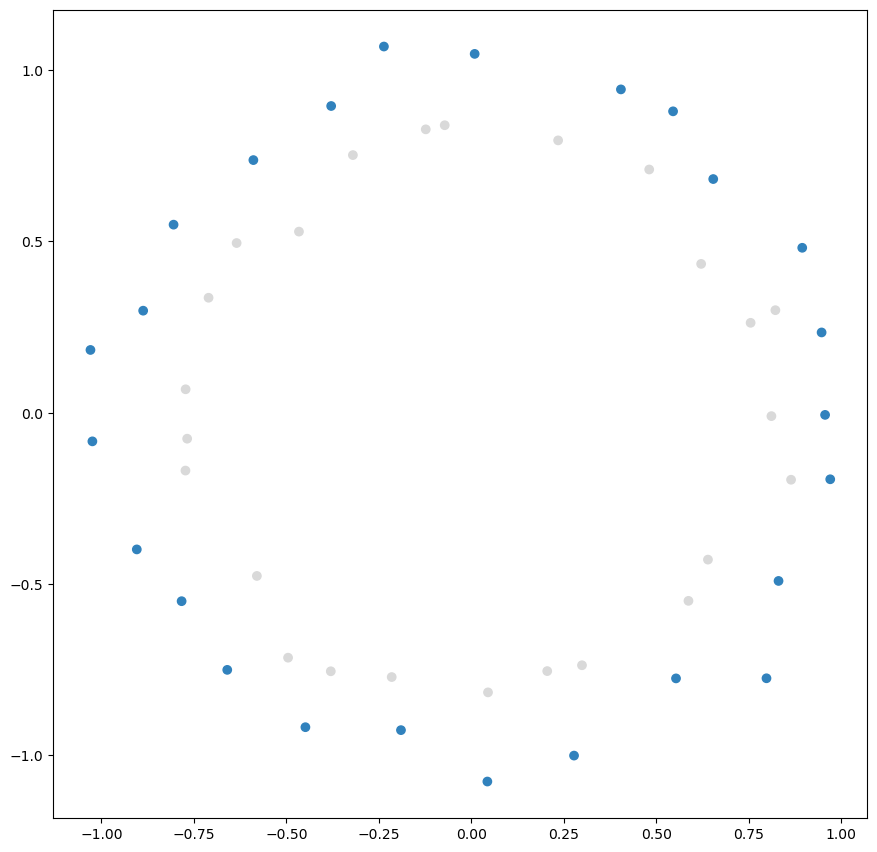

In [4]:
fig = plt.figure(figsize=(10.5, 10.5))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y,
            cmap="tab20c", marker="o")
plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
from sklearn.tree import plot_tree

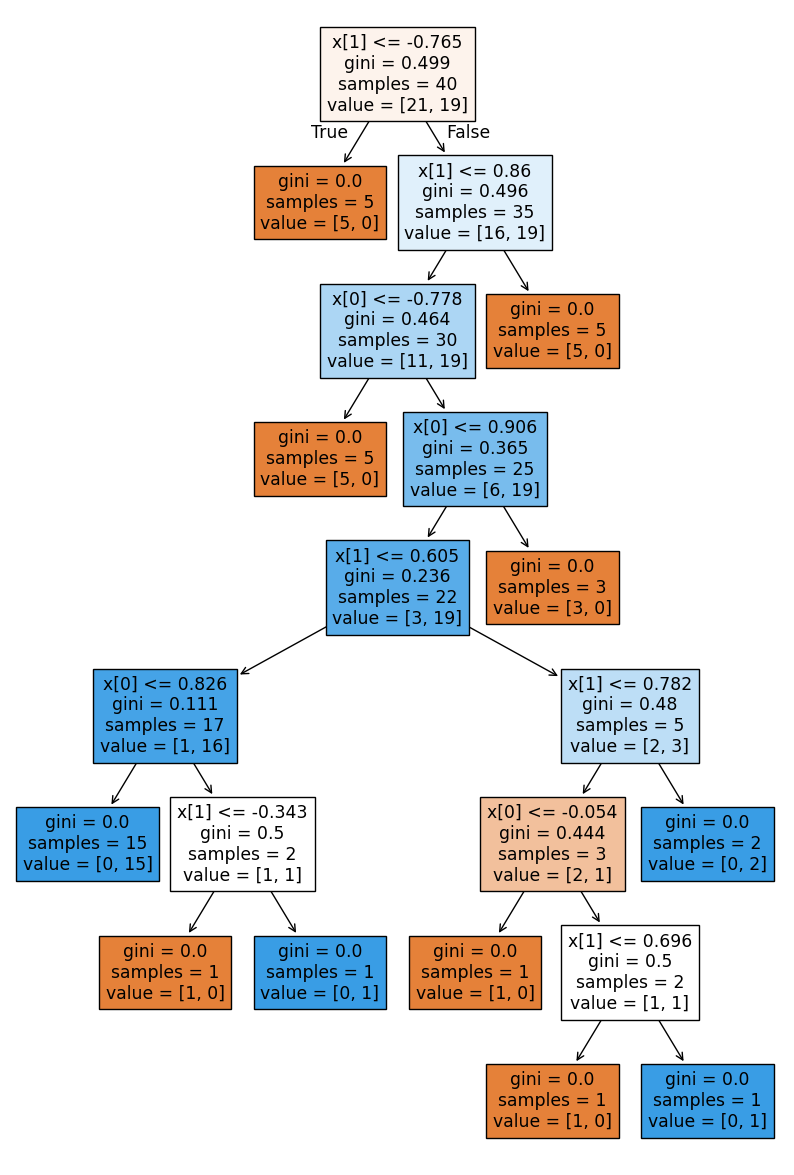

In [9]:
plt.figure(figsize=(10.0, 15.0))
plot_tree(dt, filled=True)
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
accuracy_score(y_train, dt.predict(X_train))

1.0

In [12]:
accuracy_score(y_test, dt.predict(X_test))

0.5

In [13]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0, 0.5, 'total impurity of leaves')

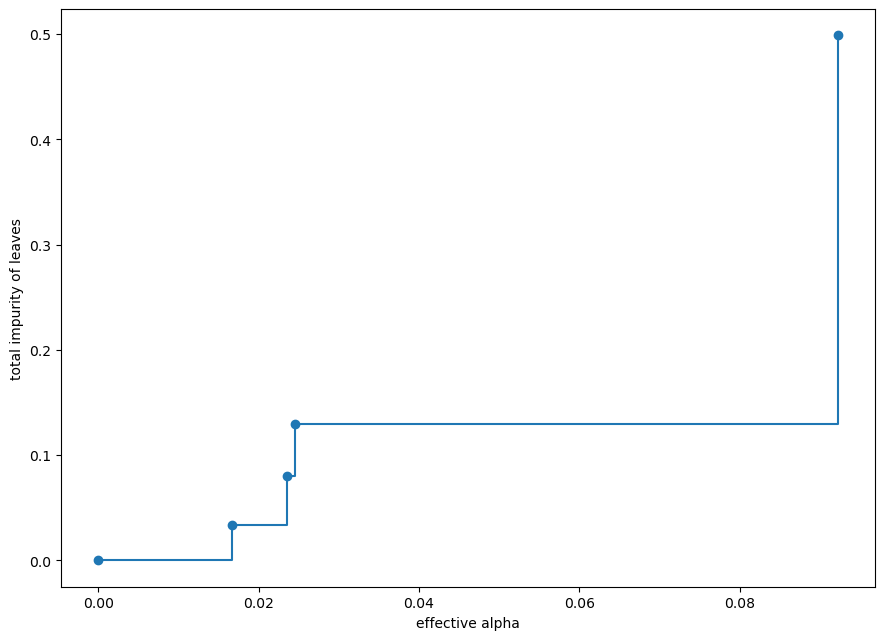

In [14]:
fig, ax = plt.subplots(figsize=(10.5, 7.5))
ax.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")

## Nauczenie drzewa z przycinaniem

Stworzymy teraz kolejne drzewo, tylko tym razem dodatkowo przytniemy je ustawiając parametr `ccp_alpha` na średnią wartość dla oryginalnego drzewa.

In [15]:
dt_pruned = DecisionTreeClassifier(ccp_alpha=ccp_alphas.mean())
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.031414772727272736)

In [18]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

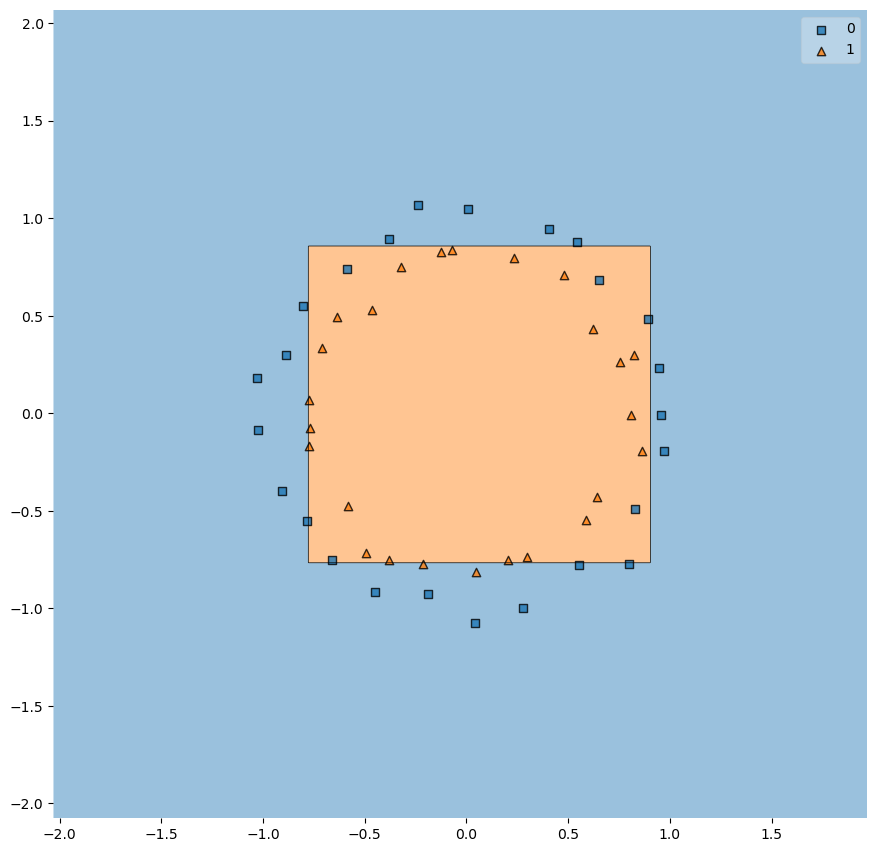

In [19]:
plt.figure(figsize=(10.5, 10.5))
plot_decision_regions(X, y, clf=dt_pruned)

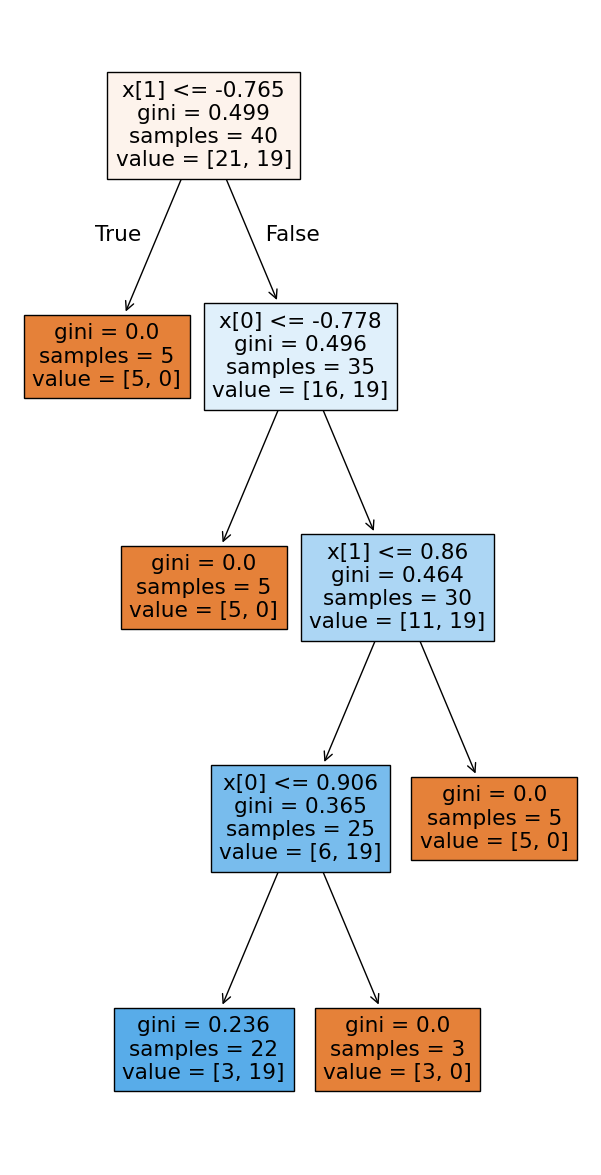

In [20]:
plt.figure(figsize=(7.5, 15.0))
plot_tree(dt_pruned, filled=True)
plt.show()

In [21]:
accuracy_score(y_train, dt_pruned.predict(X_train))

0.925

In [22]:
accuracy_score(y_test, dt_pruned.predict(X_test))

0.6